<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df

In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.1 MB/s eta 0:00:00


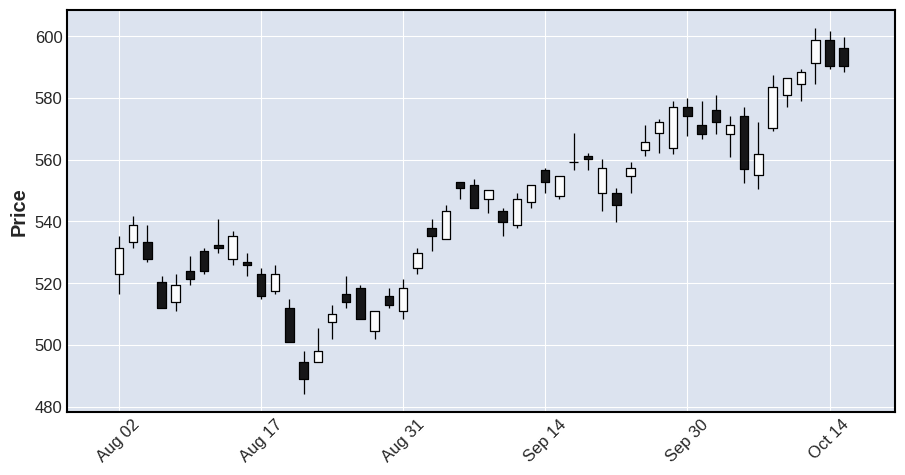

In [3]:
import mplfinance as mpf
import datetime as dt

df = get_stock_data(4902)   # コニカルノルタ
rdf = df[dt.datetime(2021, 8, 1):dt.datetime(2021, 10, 15)]
mpf.plot(rdf, type='candle', figratio=(2, 1))

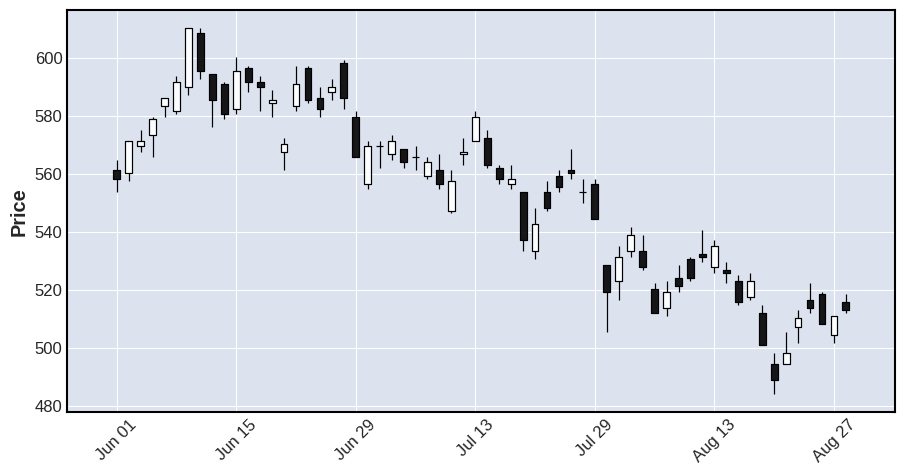

In [4]:
rdf = df[dt.datetime(2021, 6, 1):dt.datetime(2021, 8, 30)]
mpf.plot(rdf, type='candle', figratio=(2, 1))

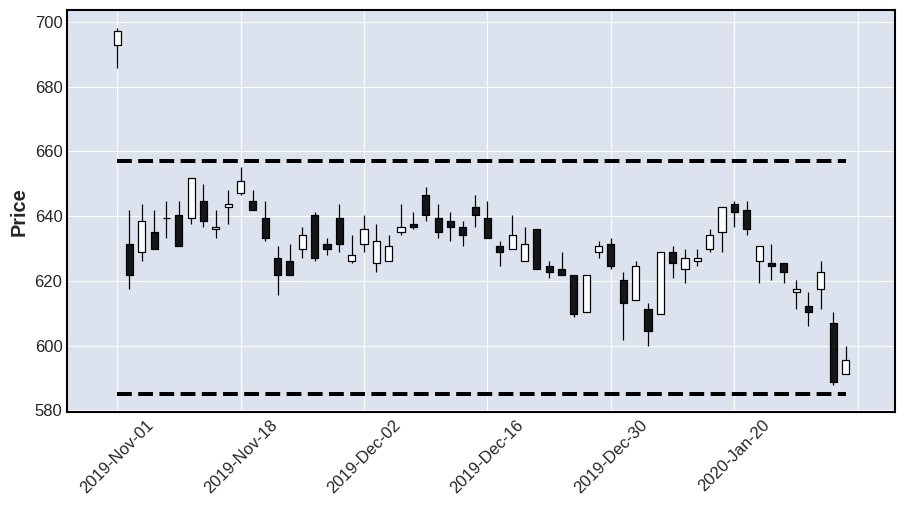

In [5]:
import pandas as pd
import numpy as np

rdf = df[dt.datetime(2019, 11, 1):dt.datetime(2020, 1, 31)]
top_series = pd.Series([657] * len(rdf.index), index=rdf.index)
bottom_series = pd.Series([585] * len(rdf.index), index=rdf.index)
apd = [ 
    mpf.make_addplot(top_series, color='black', linestyle='--'), 
    mpf.make_addplot(bottom_series, color='black', linestyle='--')
]
mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd)

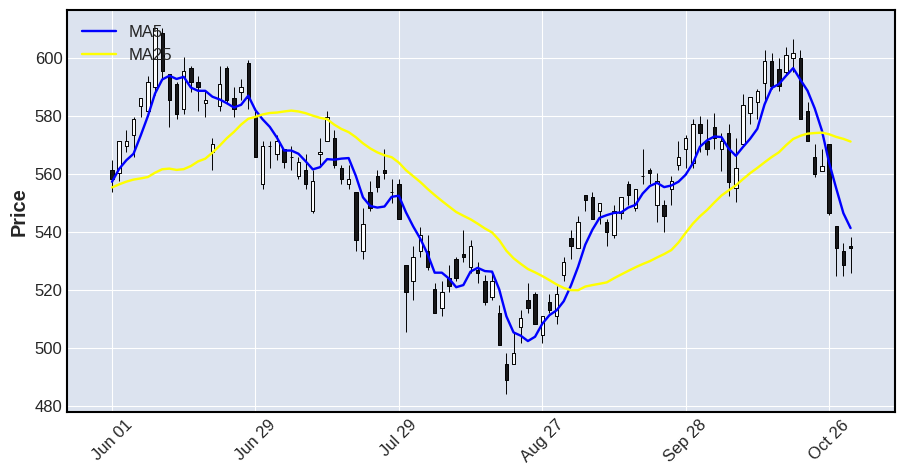

In [6]:
ma_dict = {5: 'blue', 25: 'yellow'}
for n in ma_dict:
    df[f'ma{n}'] = df['Close'].rolling(window=n).mean()


rdf = df[dt.datetime(2021, 6, 1):dt.datetime(2021, 10, 31)]
apd = [mpf.make_addplot(rdf[f'ma{n}'], color=color) for n, color in ma_dict.items()]
fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
fig.show()

In [9]:
from IPython.core.display import update_display
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-20 11:35:44--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-20 11:35:44--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-20 11:35:44--  http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfibe

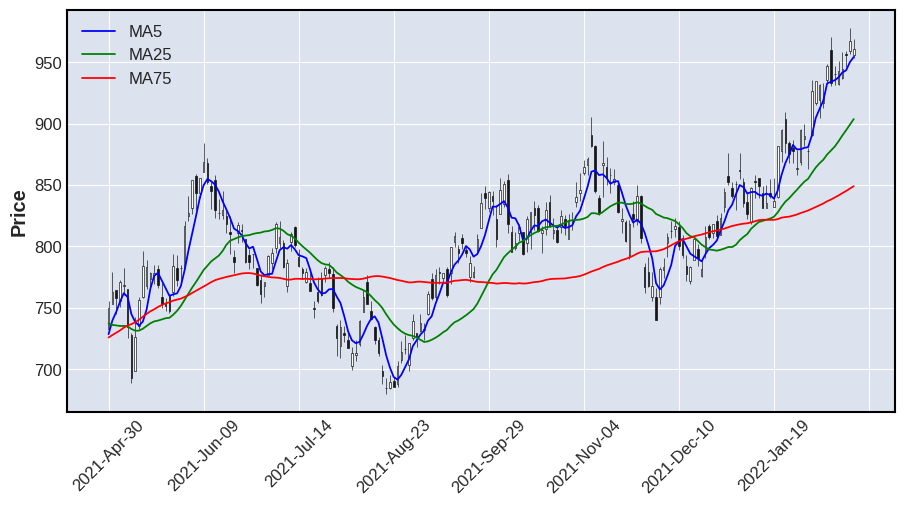

In [11]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(3099)   # 三菱伊勢丹ホールディングス
df['ma5'] = ta.SMA(df['Close'], 5)
df['ma25'] = ta.SMA(df['Close'], 25)
df['ma75'] = ta.SMA(df['Close'], 75)

cdf = df[dt.datetime(2021, 4, 30):dt.datetime(2022, 2, 20)]
apd = [
    mpf.make_addplot(cdf['ma5'], color='blue'),
    mpf.make_addplot(cdf['ma25'], color='green'),
    mpf.make_addplot(cdf['ma75'], color='red')
]

fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd,
                     returnfig=True)
axes[0].legend(['MA5', 'MA25', 'MA75'])
fig.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0, flags=flags)


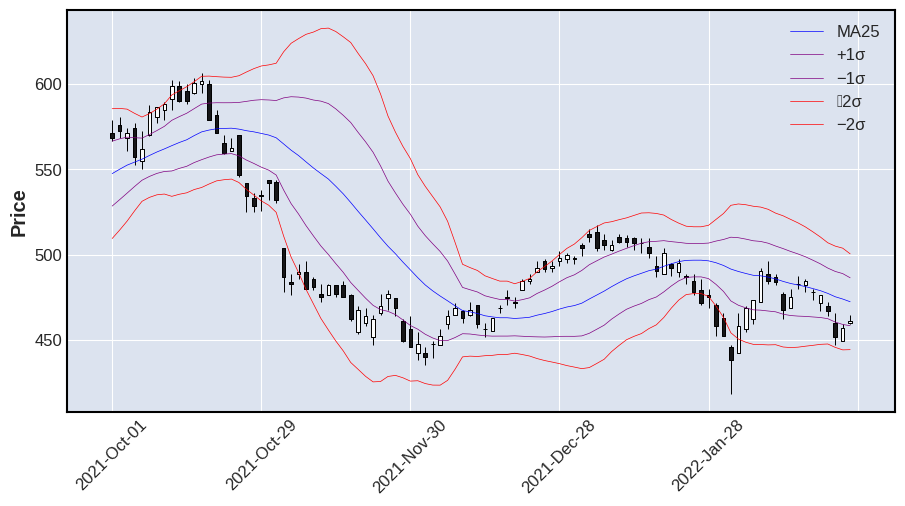

In [14]:
import mplfinance as mpf
import datetime as df
import talib as ta

df = get_stock_data(4902)   # コニカミノルタ
close = df['Close']

# 25日移動平均線
df['ma25'] = ta.SMA(close, 25)

# ボリンジャーバンド ±1σ ±2σ
df['upper1'], _, df['lower1'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
apd = [
    # 25日移動平均線
    mpf.make_addplot(cdf['ma25'], color='blue', width=0.5),
    # ボリンジャーバンド ＋1σ
    mpf.make_addplot(cdf['upper1'], color='purple', width=0.5),
    # ボリンジャーバンド −1σ
    mpf.make_addplot(cdf['lower1'], color='purple', width=0.5),
    # ボリンジャーバンド ＋2σ
    mpf.make_addplot(cdf['upper2'], color='red', width=0.5),
    # ボリンジャーバンド −2σ
    mpf.make_addplot(cdf['lower2'], color='red', width=0.5)
]

# ラベルを付けてチャートを表示
fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA25', '+1σ', '−1σ', '＋2σ', '−2σ'])
fig.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0, flags=flags)


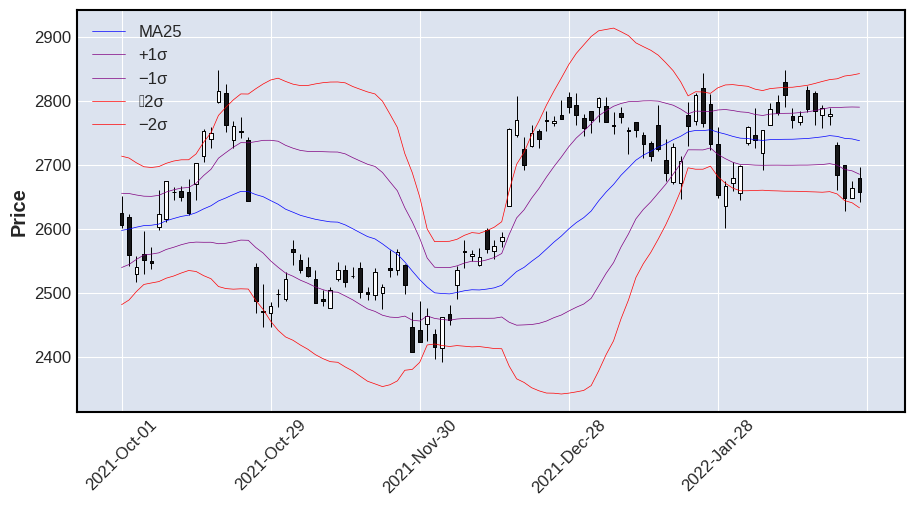

In [15]:
df = get_stock_data(7751)   # キャノン
close = df['Close']

# 25日移動平均線
df['ma25'] = ta.SMA(close, 25)

# ボリンジャーバンド ±1σ ±2σ
df['upper1'], _, df['lower1'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
apd = [
    # 25日移動平均線
    mpf.make_addplot(cdf['ma25'], color='blue', width=0.5),
    # ボリンジャーバンド ＋1σ
    mpf.make_addplot(cdf['upper1'], color='purple', width=0.5),
    # ボリンジャーバンド −1σ
    mpf.make_addplot(cdf['lower1'], color='purple', width=0.5),
    # ボリンジャーバンド ＋2σ
    mpf.make_addplot(cdf['upper2'], color='red', width=0.5),
    # ボリンジャーバンド −2σ
    mpf.make_addplot(cdf['lower2'], color='red', width=0.5)
]

# ラベルを付けてチャートを表示
fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA25', '+1σ', '−1σ', '＋2σ', '−2σ'])
fig.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0, flags=flags)


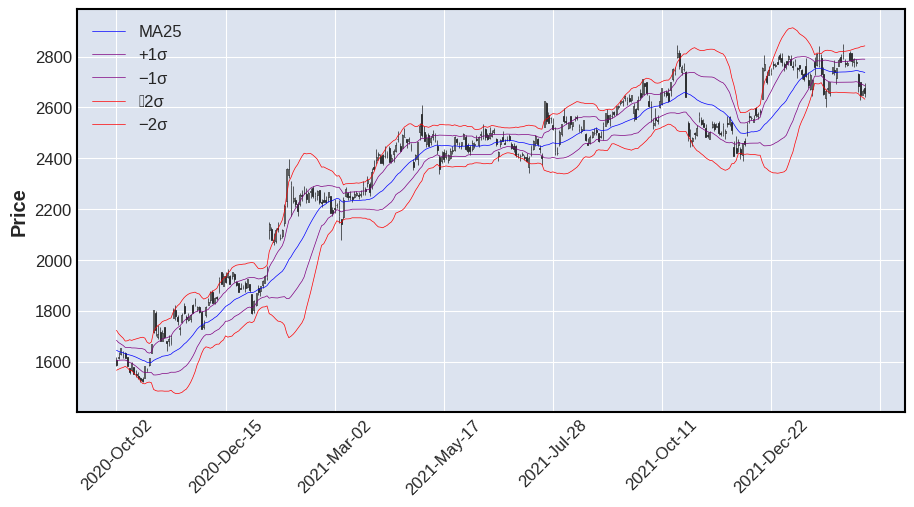

In [16]:
df = get_stock_data(7751)   # キャノン
close = df['Close']

# 25日移動平均線
df['ma25'] = ta.SMA(close, 25)

# ボリンジャーバンド ±1σ ±2σ
df['upper1'], _, df['lower1'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2020.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2020, 10, 1):dt.datetime(2022, 2, 28)]
apd = [
    # 25日移動平均線
    mpf.make_addplot(cdf['ma25'], color='blue', width=0.5),
    # ボリンジャーバンド ＋1σ
    mpf.make_addplot(cdf['upper1'], color='purple', width=0.5),
    # ボリンジャーバンド −1σ
    mpf.make_addplot(cdf['lower1'], color='purple', width=0.5),
    # ボリンジャーバンド ＋2σ
    mpf.make_addplot(cdf['upper2'], color='red', width=0.5),
    # ボリンジャーバンド −2σ
    mpf.make_addplot(cdf['lower2'], color='red', width=0.5)
]

# ラベルを付けてチャートを表示
fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA25', '+1σ', '−1σ', '＋2σ', '−2σ'])
fig.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0, flags=flags)


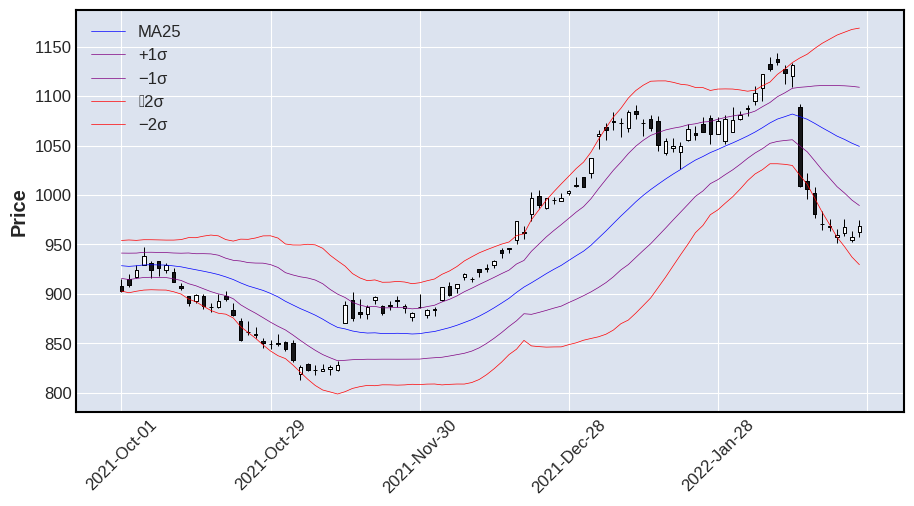

In [17]:
df = get_stock_data(7182)   # ゆうちょ銀行
close = df['Close']

# 25日移動平均線
df['ma25'] = ta.SMA(close, 25)

# ボリンジャーバンド ±1σ ±2σ
df['upper1'], _, df['lower1'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021, 10, 1):dt.datetime(2022, 2, 28)]
apd = [
    # 25日移動平均線
    mpf.make_addplot(cdf['ma25'], color='blue', width=0.5),
    # ボリンジャーバンド ＋1σ
    mpf.make_addplot(cdf['upper1'], color='purple', width=0.5),
    # ボリンジャーバンド −1σ
    mpf.make_addplot(cdf['lower1'], color='purple', width=0.5),
    # ボリンジャーバンド ＋2σ
    mpf.make_addplot(cdf['upper2'], color='red', width=0.5),
    # ボリンジャーバンド −2σ
    mpf.make_addplot(cdf['lower2'], color='red', width=0.5)
]

# ラベルを付けてチャートを表示
fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA25', '+1σ', '−1σ', '＋2σ', '−2σ'])
fig.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65291 missing from current font.
  font.set_text(s, 0, flags=flags)


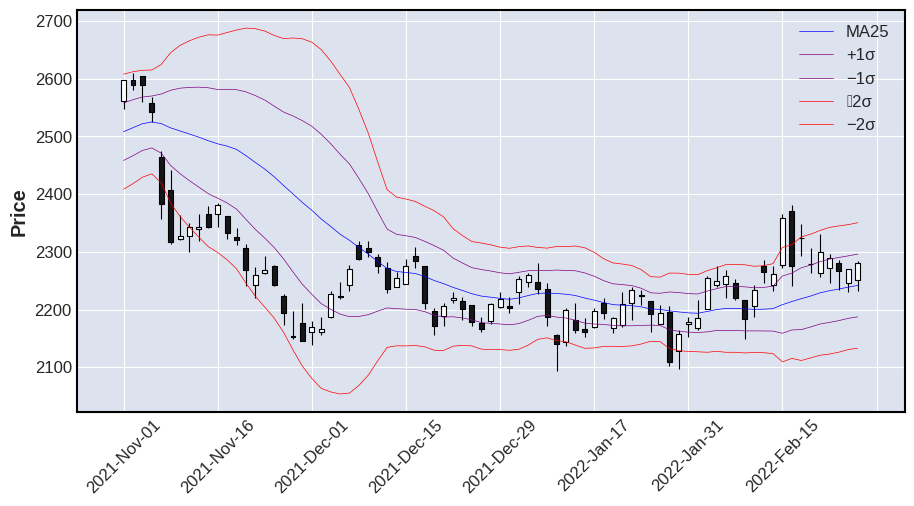

In [19]:
df = get_stock_data(9783)   # ベネッセホールディングス
close = df['Close']

# 25日移動平均線
df['ma25'] = ta.SMA(close, 25)

# ボリンジャーバンド ±1σ ±2σ
df['upper1'], _, df['lower1'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df['upper2'], _, df['lower2'] = ta.BBANDS(close, timeperiod=25,
                                          nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.11.1から2022.2.28までのチャートを作成
cdf = df[dt.datetime(2021, 11, 1):dt.datetime(2022, 2, 28)]
apd = [
    # 25日移動平均線
    mpf.make_addplot(cdf['ma25'], color='blue', width=0.5),
    # ボリンジャーバンド ＋1σ
    mpf.make_addplot(cdf['upper1'], color='purple', width=0.5),
    # ボリンジャーバンド −1σ
    mpf.make_addplot(cdf['lower1'], color='purple', width=0.5),
    # ボリンジャーバンド ＋2σ
    mpf.make_addplot(cdf['upper2'], color='red', width=0.5),
    # ボリンジャーバンド −2σ
    mpf.make_addplot(cdf['lower2'], color='red', width=0.5)
]

# ラベルを付けてチャートを表示
fig, axes = mpf.plot(cdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA25', '+1σ', '−1σ', '＋2σ', '−2σ'])
fig.show()